In [1]:
print('ML Technique')

ML Technique


In [18]:
import numpy as np

#importing Important libraries
import pandas as pd

# Ml lirary
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Data ingestion with pandas library
df = pd.read_csv('./weather/daily_weather.csv')
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


Some Data Analysis and Data Preprocessing

In [4]:
df.shape

(1095, 11)

In [5]:
df.columns.tolist()

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [6]:
del df['number']

In [7]:
df.shape

(1095, 10)

In [8]:
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [9]:
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10)
memory usage: 85.7 KB


In [11]:
df.isnull().any()

air_pressure_9am           True
air_temp_9am               True
avg_wind_direction_9am     True
avg_wind_speed_9am         True
max_wind_direction_9am     True
max_wind_speed_9am         True
rain_accumulation_9am      True
rain_duration_9am          True
relative_humidity_9am     False
relative_humidity_3pm     False
dtype: bool

Handling missing Values Each Featurewise

In [12]:
df['air_pressure_9am'].isnull().sum()

3

In [13]:
df['air_pressure_9am'].mode()

0    918.6
dtype: float64

In [14]:
df['air_pressure_9am'].value_counts()

918.600000    3
918.710000    2
921.340000    2
916.100000    2
917.100000    2
             ..
919.480000    1
913.640000    1
920.870000    1
919.477927    1
922.593064    1
Name: air_pressure_9am, Length: 1070, dtype: int64

In [15]:
m= df['air_pressure_9am'].mean()

In [16]:
m

918.8825513138094

In [21]:
# Now replace the Nan value with this mean value
df['air_pressure_9am'].fillna(m,inplace = True)

In [22]:
df['air_pressure_9am'].isnull().sum()

0

In [24]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [25]:
df['air_temp_9am'].value_counts()

62.870000    2
64.814000    1
71.780000    1
49.082000    1
59.428555    1
            ..
49.892000    1
69.745830    1
70.612192    1
75.506000    1
66.758000    1
Name: air_temp_9am, Length: 1089, dtype: int64

In [26]:
df['air_temp_9am'].mode()

0    62.87
dtype: float64

In [27]:
df['air_temp_9am'].describe()

count    1090.000000
mean       64.933001
std        11.175514
min        36.752000
25%        57.281000
50%        65.715479
75%        73.450974
max        98.906000
Name: air_temp_9am, dtype: float64

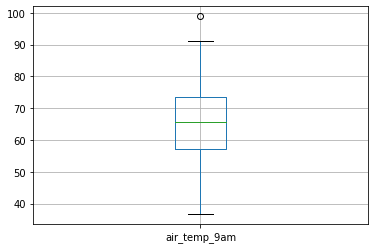

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

df.boxplot(column= 'air_temp_9am')

In [31]:
#So its better to replace nan value with mean instead of going for mode

df['air_temp_9am'].fillna(df['air_temp_9am'].mean(), inplace = True)

In [33]:
df['air_temp_9am'].isnull().any()

False

In [34]:
# Going to the next Features
df['avg_wind_direction_9am'].value_counts()

171.600000    4
180.200000    4
171.900000    3
181.000000    3
120.900000    3
             ..
195.126694    1
174.200000    1
204.483736    1
119.500000    1
163.000000    1
Name: avg_wind_direction_9am, Length: 1004, dtype: int64

In [35]:
df['avg_wind_direction_9am'].describe()

count    1091.000000
mean      142.235511
std        69.137859
min        15.500000
25%        65.972506
50%       166.000000
75%       191.000000
max       343.400000
Name: avg_wind_direction_9am, dtype: float64

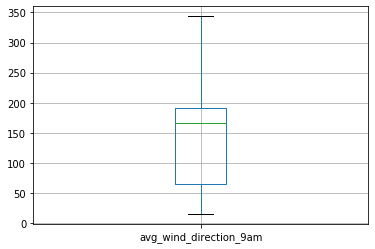

In [39]:
df.boxplot(column = 'avg_wind_direction_9am' )

In [41]:
df['avg_wind_direction_9am'].fillna(df['avg_wind_direction_9am'].mean(), inplace = True)

In [42]:
df['avg_wind_direction_9am'].isnull().any()

False

In [43]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [44]:
df['rain_accumulation_9am'].value_counts()

0.000000    964
0.010000     12
0.020000      5
0.050000      3
0.040000      3
           ... 
0.220000      1
0.050000      1
5.560000      1
0.050000      1
0.001194      1
Name: rain_accumulation_9am, Length: 98, dtype: int64

In [45]:
df['rain_accumulation_9am'].mode()

0    0.0
dtype: float64

In [47]:
df['rain_accumulation_9am'].fillna(0.0, inplace = True)

In [48]:
df['rain_accumulation_9am'].value_counts()

0.000000    970
0.010000     12
0.020000      5
0.050000      3
0.040000      3
           ... 
0.220000      1
0.050000      1
5.560000      1
0.050000      1
0.001194      1
Name: rain_accumulation_9am, Length: 98, dtype: int64

In [49]:
df['max_wind_speed_9am'].value_counts()

3.981753     2
13.712442    2
6.912145     2
8.030615     2
4.809421     2
            ..
4.540988     1
13.692873    1
2.906513     1
2.891295     1
2.684328     1
Name: max_wind_speed_9am, Length: 1085, dtype: int64

In [50]:
df['max_wind_speed_9am'].describe()

count    1091.000000
mean        7.019514
std         5.598209
min         1.185578
25%         3.067477
50%         4.943637
75%         8.947760
max        29.840780
Name: max_wind_speed_9am, dtype: float64

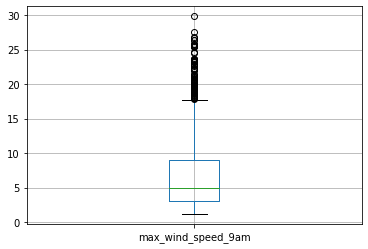

In [51]:
df.boxplot(column = 'max_wind_speed_9am')

In [52]:
# we have to drop the rows in this as there is no proper relation seen in this column

In [56]:
df['max_wind_speed_9am'].dropna(axis = 0,inplace = True)

In [57]:
df.shape

(1095, 10)

In [58]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     0
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [59]:
df['rain_duration_9am'].value_counts()

0.000000       908
10.000000       15
20.000000       10
40.000000        6
80.000000        4
              ... 
6950.000000      1
9974.000000      1
1030.000000      1
34.231597        1
1480.000000      1
Name: rain_duration_9am, Length: 142, dtype: int64

In [61]:
df['rain_duration_9am'].fillna(0.0,inplace = True)

In [62]:
df['max_wind_direction_9am'].value_counts()

191.400000    5
190.800000    5
189.800000    4
185.300000    4
72.700000     3
             ..
37.800000     1
59.430577     1
69.000000     1
63.638273     1
85.500000     1
Name: max_wind_direction_9am, Length: 991, dtype: int64

In [63]:
df['max_wind_direction_9am'].describe()

count    1092.000000
mean      148.953518
std        67.238013
min        28.900000
25%        76.553003
50%       177.300000
75%       201.233153
max       312.200000
Name: max_wind_direction_9am, dtype: float64

In [64]:
df.dropna(axis = 0,inplace = True)

In [65]:
df.shape

(1085, 10)

In [66]:
df.isnull().any()

air_pressure_9am          False
air_temp_9am              False
avg_wind_direction_9am    False
avg_wind_speed_9am        False
max_wind_direction_9am    False
max_wind_speed_9am        False
rain_accumulation_9am     False
rain_duration_9am         False
relative_humidity_9am     False
relative_humidity_3pm     False
dtype: bool

Now the data is clean , now we apply our Classification Technique to Obtain "relative_humidity_3pm"

In [67]:
df.head(20)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


In [68]:
# So we need to normalize the data first

In [69]:
# Now our data is ready for the Ml

Convert to Classification Task

Binarize the relative_humidity_3pm to 0 or 1.

In [70]:
df['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [71]:
df['relative_humidity_3pm'].value_counts()

20.890000    2
58.090000    1
68.270000    1
55.150000    1
31.780000    1
            ..
54.770000    1
8.620000     1
17.510000    1
20.367786    1
66.000000    1
Name: relative_humidity_3pm, Length: 1084, dtype: int64

In [72]:
df['relative_humidity_3pm'].unique().size

1084

In [73]:
df.shape

(1085, 10)

In [74]:
df.mean()

air_pressure_9am          918.900395
air_temp_9am               65.020772
avg_wind_direction_9am    142.236039
avg_wind_speed_9am          5.495001
max_wind_direction_9am    148.853431
max_wind_speed_9am          7.007701
rain_accumulation_9am       0.191982
rain_duration_9am         269.924662
relative_humidity_9am      34.052503
relative_humidity_3pm      35.165858
dtype: float64

In [75]:
df['relative_humidity_3pm'].describe()

count    1085.000000
mean       35.165858
std        22.385661
min         5.300000
25%        17.363746
50%        24.370000
75%        51.900000
max        92.250000
Name: relative_humidity_3pm, dtype: float64

In [76]:
df['relative_humidity_3pm'].median()

24.369999999999948

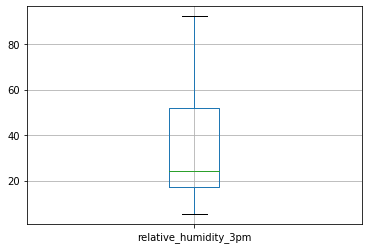

In [77]:
df.boxplot(column = 'relative_humidity_3pm')

In [78]:
# So to binarize the data we use 24.36 as our middle value

In [79]:
#First copy the data (to not get any harm to real data)
clean_data = df.copy()
clean_data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [80]:
clean_data.shape

(1085, 10)

In [81]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [82]:
#Make new column
clean_data['high_humidity'] = (clean_data['relative_humidity_3pm']>24.36)*1
clean_data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [83]:
clean_data['high_humidity'].value_counts()

1    543
0    542
Name: high_humidity, dtype: int64

In [84]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humidity'],
      dtype='object')

In [85]:
# Now define YOur feature and Target Column

X = clean_data[['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']]

In [86]:
Y = clean_data[['high_humidity']]

In [88]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [89]:
Y.columns

Index(['high_humidity'], dtype='object')

In [87]:
Y.head()

,high_humidity
0,1
1,0
2,0
3,0
4,1


In [90]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [91]:
# Now Insert the Training Data in the Ml Algorithm

In [95]:
#Make an instance of your model
dr= DecisionTreeClassifier(max_leaf_nodes=10, random_state= 0)

In [96]:
dr

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [98]:
dr.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [99]:
p = dr.predict(x_test)

In [100]:
p

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [101]:
y_test


,high_humidity
205,0
184,1
359,0
1079,1
273,1
...,...
572,1
686,1
649,0
771,0


In [102]:
#Measure the accuracy of the Classifier

In [103]:
a = accuracy_score(y_test, p)

In [104]:
a

0.9124423963133641